# Análisis de Datos

**Objetivo del proyecto:** Analizar el nivel de impacto de las descargas de *Aguas Residuales* de las *Centrales Termoeléctricas* en los cuerpos receptores, siendo éstos, ríos, lagos y/o mares.

## Importar librerías

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd

In [42]:
df = pd.DataFrame()
anio_inicial=2017
anio_final=2022
for anio in range(anio_inicial,anio_final+1):
    for mes in range(1,13):
        if(mes<10):
            mes="0"+str(mes)
        path = f'./data/{anio}/EMISIONES/Emisiones{anio}-{mes}_Act2022-09-01.csv'
        frame = pd.read_csv(path,sep=',',low_memory=False)
        frame['ANIO'] = int(anio)
        frame['MES'] = int(mes)
        df = pd.concat([df, frame], axis=0, ignore_index=True)
        if(anio==2022) and (mes=='07'):
            break

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626961 entries, 0 to 2626960
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   PeriodoInforme           object 
 1   RUT                      object 
 2   RazonSocial              object 
 3   Planta                   object 
 4   PuntoDeDescarga          object 
 5   CuerpoReceptor           object 
 6   Norma                    object 
 7   Muestra                  int64  
 8   MuestraParametro_Codigo  int64  
 9   Parametro                object 
 10  Unidad                   object 
 11  Valor reportado          float64
 12  Caudal Muestra (m3/dia)  float64
 13  RPM                      float64
 14  Tipo de control          object 
 15  Laboratorio              object 
 16  UnidadFiscalizable       object 
 17  RegionId                 float64
 18  RegionNombre             object 
 19  ComunaId                 float64
 20  ComunaNombre             object 
 21  NombreCa

In [44]:
df_termoelectricas = df[df["NombreSubCategoria"] == "Central termoeléctrica"]

In [45]:
df_termoelectricas.shape

(234402, 32)

La emisión de distintos niveles de Metales Pesados y otros parámetros relevantes (Ejemplo: Hierro, Cobre, Mercurio, Molibdeno, Temperatura etc.) que se descargan a los cuerpos receptores

In [46]:
df_termoelectricas_filtrado = df_termoelectricas[(df_termoelectricas["Parametro"]=='Hierro Disuelto') |
        (df_termoelectricas["Parametro"]=='Cobre') |
        (df_termoelectricas["Parametro"]=='Mercurio') |
        (df_termoelectricas["Parametro"]=='Molibdeno') |
        (df_termoelectricas["Parametro"]=='Temperatura') |
        (df_termoelectricas["Parametro"]=='Caudal')]
df_termoelectricas_filtrado.reset_index()

,index,PeriodoInforme,RUT,RazonSocial,Planta,PuntoDeDescarga,CuerpoReceptor,Norma,Muestra,MuestraParametro_Codigo,...,NombreSubCategoria,Latitud,Longitud,CodigoRETC,Tabla,Direccion,NumeroRCA,FechaRCA,ANIO,MES
0,2146,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30386,707147,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
1,2153,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,707172,707172,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
2,2157,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30395,707359,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
3,2164,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,707433,707433,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
4,2168,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30399,707561,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94978,2618999,2022/07/01 00:00:00,96717620-6,SOCIEDAD ELECTRICA SANTIAGO SPA,SANTA LIDIA,PUNTO 1 CANAL COLONIA SUR,CANAL COLONIA SUR,DS 90,132079,4328177,...,Central termoeléctrica,-37.078033,-72.345822,3188001,Tabla 1,"CAMINO A CHARRÚA KM 7, Cabrero",NaN,NaN,2022,7
94979,2620263,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383883,4383883,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7
94980,2620274,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383909,4383909,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7
94981,2620283,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383919,4383919,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7


In [47]:
df_termoelectricas_filtrado.shape

(94983, 32)

In [48]:
df_termoelectricas_filtrado["Parametro"].value_counts()

Temperatura        63333
Caudal             19995
Hierro Disuelto     4782
Cobre               3162
Molibdeno           2004
Mercurio            1707
Name: Parametro, dtype: int64

Remover duplicados

In [49]:
df_termoelectricas_filtrado = df_termoelectricas_filtrado.drop_duplicates()
df_termoelectricas_filtrado.reset_index()

,index,PeriodoInforme,RUT,RazonSocial,Planta,PuntoDeDescarga,CuerpoReceptor,Norma,Muestra,MuestraParametro_Codigo,...,NombreSubCategoria,Latitud,Longitud,CodigoRETC,Tabla,Direccion,NumeroRCA,FechaRCA,ANIO,MES
0,2146,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30386,707147,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
1,2153,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,707172,707172,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
2,2157,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30395,707359,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
3,2164,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,707433,707433,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
4,2168,2017/01/01 00:00:00,76004976-K,EMPRESA ELECTRICA ANGAMOS S.A.,CENTRAL TERMOELÉCTRICA ANGAMOS,T.ANGAMOS,BAHIA MEJILLONES,DS 90,30399,707561,...,Central termoeléctrica,-23.025082,-70.320068,5452292,Tabla 4,"SÉPTIMA INDUSTRIAL 1100, Mejillones",290,2013-08-01,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71947,2618999,2022/07/01 00:00:00,96717620-6,SOCIEDAD ELECTRICA SANTIAGO SPA,SANTA LIDIA,PUNTO 1 CANAL COLONIA SUR,CANAL COLONIA SUR,DS 90,132079,4328177,...,Central termoeléctrica,-37.078033,-72.345822,3188001,Tabla 1,"CAMINO A CHARRÚA KM 7, Cabrero",NaN,NaN,2022,7
71948,2620263,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383883,4383883,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7
71949,2620274,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383909,4383909,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7
71950,2620283,2022/07/01 00:00:00,96814370-0,EMPRESA ELECTRICA VENTANAS S.A,CENTRAL TERMOELÉCTRICA NUEVA VENTANAS,VENTANAS.3,BAHÍA QUINTERO,DS 90,4383919,4383919,...,Central termoeléctrica,-32.749400,-71.483300,309729,Tabla 4,"F-30-E S/N, Puchuncaví",1124,2013-08-16,2022,7


In [50]:
df_termoelectricas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71952 entries, 2146 to 2620293
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PeriodoInforme           71952 non-null  object 
 1   RUT                      71952 non-null  object 
 2   RazonSocial              71952 non-null  object 
 3   Planta                   71952 non-null  object 
 4   PuntoDeDescarga          71952 non-null  object 
 5   CuerpoReceptor           71952 non-null  object 
 6   Norma                    71952 non-null  object 
 7   Muestra                  71952 non-null  int64  
 8   MuestraParametro_Codigo  71952 non-null  int64  
 9   Parametro                71952 non-null  object 
 10  Unidad                   71952 non-null  object 
 11  Valor reportado          71952 non-null  float64
 12  Caudal Muestra (m3/dia)  71952 non-null  float64
 13  RPM                      71952 non-null  float64
 14  Tipo de control  

In [51]:
df_termoelectricas_filtrado["Planta"].value_counts()

CENTRAL TERMOELECTRICA BOCAMINA U1                16939
CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA             8992
GUACOLDA                                           7399
CENTRAL TERMICA ANDINA                             6395
CENTRAL TERMOELÉCTRICA COCHRANE                    4563
COMPLEJO TERMOELÉCTRICO NEHUENCO                   4389
CENTRAL TERMOELECTRICA CAMPICHE                    4123
SAN ISIDRO 2                                       2798
CENTRAL TÉRMICA MEJILLONES                         2321
CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2     2212
CENTRAL COLMITO                                    1787
CENTRAL TERMOELÉCTRICA LOS PINOS                   1612
RENCA NUEVA RENCA                                  1344
CENTRAL SAN ISIDRO I                               1313
YUNGAY (EX CAMPANARIO)                             1238
CENTRAL TERMICA TOCOPILLA                          1051
SANTA LIDIA                                         869
CENTRAL TERMOELÉCTRICA ANGAMOS                  

In [52]:
df_termoelectricas_filtrado["CuerpoReceptor"].value_counts()

BAHÍA CORONEL         17481
BAHIA MEJILLONES      14210
BAHÍA ALGODONALES     10043
RIO ACONCAGUA          9038
PENINSULA GUACOLDA     7387
BAHÍA QUINTERO         6679
ESTERO LAJARILLA       1787
CANAL DE DERRAME       1612
RIO MAPOCHO            1344
ESTERO LOS GUINDOS     1238
CANAL COLONIA SUR       869
ESTERO CADEGUA          252
PUERTO HUASCO            12
Name: CuerpoReceptor, dtype: int64

In [53]:
df_termoelectricas_filtrado.groupby(["ANIO","MES","CuerpoReceptor", "Planta","Parametro"])["Valor reportado"].mean()

ANIO  MES  CuerpoReceptor    Planta                               Parametro      
2017  1    BAHIA MEJILLONES  CENTRAL A GAS CICLO COMBINADO KELAR  Molibdeno             0.353000
                             CENTRAL TERMICA ANDINA               Cobre                 0.050000
                                                                  Hierro Disuelto       0.575000
                                                                  Mercurio              0.001000
                                                                  Molibdeno             0.010000
                                                                                        ...     
2022  7    RIO ACONCAGUA     LOS VIENTOS                          Temperatura          14.633333
           RIO MAPOCHO       RENCA NUEVA RENCA                    Caudal             3843.154839
                                                                  Cobre                 0.020000
                                             

## Umbrales de las variables

Los valores fueron extraídos del documento **"Decreto-90 07-MAR-2001 MINISTERIO SECRETARÍA GENERAL DE LA PRESIDENCIA - Ley Chile - Biblioteca del.pdf"** el enlace al documento es: **link**

Los valores nan corresponden a valores que no tienen un umbral definido en el documento

In [54]:
Umbrales = {
    "Tabla 1" : {"Temperatura":35, "Caudal":np.nan, "Hierro Disuelto":5,  "Cobre": 1.0, "Molibdeno":1.0,  "Mercurio":0.001 },
    "Tabla 2" : {"Temperatura":40, "Caudal":np.nan, "Hierro Disuelto":10, "Cobre": 3.0, "Molibdeno":2.5,  "Mercurio":0.010 },
    "Tabla 3" : {"Temperatura":30, "Caudal":np.nan, "Hierro Disuelto":2,  "Cobre": 0.1, "Molibdeno":0.07, "Mercurio":0.005 },
    "Tabla 4" : {"Temperatura":30, "Caudal":np.nan, "Hierro Disuelto":10, "Cobre": 1.0, "Molibdeno":0.1,  "Mercurio":0.005 },
    "Tabla 5" : {"Temperatura":np.nan, "Caudal":np.nan, "Hierro Disuelto":np.nan, "Cobre": 3.0, "Molibdeno":0.5,  "Mercurio":0.020 }
}

Valores máximos reportados por cada planta y convierte el GroupBy a Frame

In [55]:
df_termoelectricas_filtrado = df_termoelectricas_filtrado.groupby(["ANIO","MES","CuerpoReceptor","Planta","Parametro","Tabla"])["Valor reportado"].max()
df_termoelectricas_filtrado= df_termoelectricas_filtrado.to_frame()
df_termoelectricas_filtrado = df_termoelectricas_filtrado.reset_index()
df_termoelectricas_filtrado

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado
0,2017,1,BAHIA MEJILLONES,CENTRAL A GAS CICLO COMBINADO KELAR,Molibdeno,Tabla 5,0.353
1,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Cobre,Tabla 4,0.050
2,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Hierro Disuelto,Tabla 4,1.320
3,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Mercurio,Tabla 4,0.001
4,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Molibdeno,Tabla 4,0.010
...,...,...,...,...,...,...,...
4583,2022,7,RIO ACONCAGUA,LOS VIENTOS,Temperatura,Tabla 1,14.800
4584,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Caudal,Tabla 1,5248.100
4585,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Cobre,Tabla 1,0.020
4586,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Hierro Disuelto,Tabla 1,0.070


Creación de la columna umbrales a partir de los valores extraídos del documento

In [56]:
umbral_list=[]
for i in range(len(df_termoelectricas_filtrado)):
    umbral_list.append(Umbrales[df_termoelectricas_filtrado["Tabla"][i]] [df_termoelectricas_filtrado["Parametro"][i]])

df_termoelectricas_filtrado["Umbral"]=umbral_list
df_termoelectricas_filtrado

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral
0,2017,1,BAHIA MEJILLONES,CENTRAL A GAS CICLO COMBINADO KELAR,Molibdeno,Tabla 5,0.353,0.500
1,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Cobre,Tabla 4,0.050,1.000
2,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Hierro Disuelto,Tabla 4,1.320,10.000
3,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Mercurio,Tabla 4,0.001,0.005
4,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Molibdeno,Tabla 4,0.010,0.100
...,...,...,...,...,...,...,...,...
4583,2022,7,RIO ACONCAGUA,LOS VIENTOS,Temperatura,Tabla 1,14.800,35.000
4584,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Caudal,Tabla 1,5248.100,NaN
4585,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Cobre,Tabla 1,0.020,1.000
4586,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Hierro Disuelto,Tabla 1,0.070,5.000


Creación de la columna diferencia_umbral: diferencia_umbral = Valor reportado - Umbral

In [57]:
df_termoelectricas_filtrado["diferencia_umbral"] = df_termoelectricas_filtrado["Valor reportado"] - df_termoelectricas_filtrado["Umbral"]
df_termoelectricas_filtrado

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral
0,2017,1,BAHIA MEJILLONES,CENTRAL A GAS CICLO COMBINADO KELAR,Molibdeno,Tabla 5,0.353,0.500,-0.147
1,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Cobre,Tabla 4,0.050,1.000,-0.950
2,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Hierro Disuelto,Tabla 4,1.320,10.000,-8.680
3,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Mercurio,Tabla 4,0.001,0.005,-0.004
4,2017,1,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Molibdeno,Tabla 4,0.010,0.100,-0.090
...,...,...,...,...,...,...,...,...,...
4583,2022,7,RIO ACONCAGUA,LOS VIENTOS,Temperatura,Tabla 1,14.800,35.000,-20.200
4584,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Caudal,Tabla 1,5248.100,NaN,NaN
4585,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Cobre,Tabla 1,0.020,1.000,-0.980
4586,2022,7,RIO MAPOCHO,RENCA NUEVA RENCA,Hierro Disuelto,Tabla 1,0.070,5.000,-4.930


Creación de la columna % diferencia_umbral: diferencia_umbral = Valor reportado - Umbral

In [58]:
df_termoelectricas_filtrado["% diferencia_umbral"] = (df_termoelectricas_filtrado["diferencia_umbral"] / df_termoelectricas_filtrado["Umbral"])*100
df_termoelectricas_filtrado["% diferencia_umbral"] = round(df_termoelectricas_filtrado["% diferencia_umbral"],1)
df_termoelectricas_filtrado.sort_values(by=['% diferencia_umbral'],ascending=False)

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
312,2017,5,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.402,0.100,0.302,302.0
982,2018,3,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.287,0.100,0.187,187.0
243,2017,4,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.268,0.100,0.168,168.0
1662,2019,1,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA COCHRANE,Molibdeno,Tabla 4,0.259,0.100,0.159,159.0
2503,2020,1,PENINSULA GUACOLDA,GUACOLDA,Mercurio,Tabla 4,0.009,0.005,0.004,80.0
...,...,...,...,...,...,...,...,...,...,...
4568,2022,7,ESTERO LOS GUINDOS,YUNGAY (EX CAMPANARIO),Caudal,Tabla 1,418.000,NaN,NaN,NaN
4573,2022,7,PENINSULA GUACOLDA,GUACOLDA,Caudal,Tabla 4,416474.000,NaN,NaN,NaN
4578,2022,7,RIO ACONCAGUA,COMPLEJO TERMOELÉCTRICO NEHUENCO,Caudal,Tabla 2,4265.000,NaN,NaN,NaN
4581,2022,7,RIO ACONCAGUA,LOS VIENTOS,Caudal,Tabla 1,531.029,NaN,NaN,NaN


## Temperatura

In [59]:
temperaturas = df_termoelectricas_filtrado[df_termoelectricas_filtrado["Parametro"]=="Temperatura"].sort_values(by=['% diferencia_umbral'], ascending=False)
temperaturas

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
2320,2019,11,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,34.1,30.0,4.1,13.7
2527,2020,2,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA ANGAMOS,Temperatura,Tabla 4,32.6,30.0,2.6,8.7
2022,2019,6,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,32.3,30.0,2.3,7.7
2745,2020,5,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,31.0,30.0,1.0,3.3
701,2017,11,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA ANGAMOS,Temperatura,Tabla 4,30.4,30.0,0.4,1.3
...,...,...,...,...,...,...,...,...,...,...
4181,2022,2,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Temperatura,Tabla 5,26.0,NaN,NaN,NaN
4250,2022,3,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Temperatura,Tabla 5,25.1,NaN,NaN,NaN
4323,2022,4,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Temperatura,Tabla 5,23.9,NaN,NaN,NaN
4392,2022,5,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Temperatura,Tabla 5,23.9,NaN,NaN,NaN


In [60]:
temperaturas[temperaturas["% diferencia_umbral"] > 0]

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
2320,2019,11,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,34.10,30.0,4.10,13.7
2527,2020,2,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA ANGAMOS,Temperatura,Tabla 4,32.60,30.0,2.60,8.7
2022,2019,6,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,32.30,30.0,2.30,7.7
2745,2020,5,BAHIA MEJILLONES,CENTRAL TERMICA ANDINA,Temperatura,Tabla 4,31.00,30.0,1.00,3.3
701,2017,11,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA ANGAMOS,Temperatura,Tabla 4,30.40,30.0,0.40,1.3
2156,2019,8,BAHÍA QUINTERO,CENTRAL TERMOELECTRICA CAMPICHE,Temperatura,Tabla 4,30.09,30.0,0.09,0.3


In [61]:
temperaturas.describe()

,ANIO,MES,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
count,1373.000000,1373.000000,1373.00000,1357.000000,1357.000000,1357.000000
mean,2019.307356,6.144210,22.81854,32.317612,-9.535405,-28.520265
std,1.639147,3.392825,4.81750,2.872167,6.385062,17.757772
min,2017.000000,1.000000,6.80000,30.000000,-28.200000,-80.600000
25%,2018.000000,3.000000,19.70000,30.000000,-14.700000,-42.600000
50%,2019.000000,6.000000,23.27000,30.000000,-8.200000,-26.000000
75%,2021.000000,9.000000,26.40000,35.000000,-4.200000,-13.900000
max,2022.000000,12.000000,34.20000,40.000000,4.100000,13.700000


In [62]:
temperaturas["Planta"].value_counts()

CENTRAL TÉRMICA MEJILLONES                        83
CENTRAL TERMICA ANDINA                            67
CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2    67
CENTRAL TERMOELÉCTRICA ANGAMOS                    67
CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA            67
LOS VIENTOS                                       67
CENTRAL TERMOELÉCTRICA COCHRANE                   67
SANTA LIDIA                                       66
CENTRAL TERMOELECTRICA BOCAMINA U1                65
CENTRAL TERMOELECTRICA CAMPICHE                   65
CENTRAL TERMOELÉCTRICA NUEVA VENTANAS             65
CENTRAL TERMOELÉCTRICA LOS PINOS                  65
YUNGAY (EX CAMPANARIO)                            65
CENTRAL COLMITO                                   65
CENTRAL TERMICA TOCOPILLA                         64
GUACOLDA                                          62
CENTRAL TERMOELÉCTRICA CANDELARIA                 61
COMPLEJO TERMOELECTRICO SANTA MARIA               60
COMPLEJO TERMOELÉCTRICO NEHUENCO              

In [63]:
temperaturas["CuerpoReceptor"].value_counts()

BAHIA MEJILLONES      284
BAHÍA QUINTERO        197
RIO ACONCAGUA         197
BAHÍA ALGODONALES     131
BAHÍA CORONEL         125
CANAL COLONIA SUR      66
CANAL DE DERRAME       65
ESTERO LOS GUINDOS     65
ESTERO LAJARILLA       65
PENINSULA GUACOLDA     61
ESTERO CADEGUA         61
RIO MAPOCHO            55
PUERTO HUASCO           1
Name: CuerpoReceptor, dtype: int64

In [64]:
temperaturas.groupby(["CuerpoReceptor", "Planta"])["Valor reportado"].mean()

CuerpoReceptor      Planta                                        
BAHIA MEJILLONES    CENTRAL TERMICA ANDINA                            28.659701
                    CENTRAL TERMOELÉCTRICA ANGAMOS                    27.525373
                    CENTRAL TERMOELÉCTRICA COCHRANE                   26.991493
                    CENTRAL TÉRMICA MEJILLONES                        26.120602
BAHÍA ALGODONALES   CENTRAL TERMICA TOCOPILLA                         23.737344
                    CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA            25.823881
BAHÍA CORONEL       CENTRAL TERMOELECTRICA BOCAMINA U1                21.071692
                    COMPLEJO TERMOELECTRICO SANTA MARIA               22.117583
BAHÍA QUINTERO      CENTRAL TERMOELECTRICA CAMPICHE                   23.091538
                    CENTRAL TERMOELÉCTRICA NUEVA VENTANAS             21.763231
                    CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2    25.061642
CANAL COLONIA SUR   SANTA LIDIA                      

In [65]:
temperaturas.groupby(["CuerpoReceptor", "Planta"])["Valor reportado"].max()

CuerpoReceptor      Planta                                        
BAHIA MEJILLONES    CENTRAL TERMICA ANDINA                            34.10
                    CENTRAL TERMOELÉCTRICA ANGAMOS                    32.60
                    CENTRAL TERMOELÉCTRICA COCHRANE                   29.80
                    CENTRAL TÉRMICA MEJILLONES                        30.20
BAHÍA ALGODONALES   CENTRAL TERMICA TOCOPILLA                         29.30
                    CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA            29.10
BAHÍA CORONEL       CENTRAL TERMOELECTRICA BOCAMINA U1                29.30
                    COMPLEJO TERMOELECTRICO SANTA MARIA               26.20
BAHÍA QUINTERO      CENTRAL TERMOELECTRICA CAMPICHE                   30.09
                    CENTRAL TERMOELÉCTRICA NUEVA VENTANAS             27.10
                    CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2    29.60
CANAL COLONIA SUR   SANTA LIDIA                                       24.50
CANAL DE DERRAME    C

In [66]:
temperaturas["Tabla"].value_counts()

Tabla 4    783
Tabla 1    519
Tabla 2     55
Tabla 5     16
Name: Tabla, dtype: int64

## Hierro Disuelto

In [67]:
hierro_d = df_termoelectricas_filtrado[df_termoelectricas_filtrado["Parametro"]=="Hierro Disuelto"].sort_values(by=['% diferencia_umbral'], ascending=False)
hierro_d

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
2418,2019,12,CANAL DE DERRAME,CENTRAL TERMOELÉCTRICA LOS PINOS,Hierro Disuelto,Tabla 1,4.690,5.0,-0.310,-6.2
1522,2018,10,PENINSULA GUACOLDA,GUACOLDA,Hierro Disuelto,Tabla 4,8.000,10.0,-2.000,-20.0
3856,2021,9,ESTERO LOS GUINDOS,YUNGAY (EX CAMPANARIO),Hierro Disuelto,Tabla 1,2.412,5.0,-2.588,-51.8
2471,2020,1,BAHÍA CORONEL,CENTRAL TERMOELECTRICA BOCAMINA U1,Hierro Disuelto,Tabla 4,4.320,10.0,-5.680,-56.8
1686,2019,1,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Hierro Disuelto,Tabla 4,3.910,10.0,-6.090,-60.9
...,...,...,...,...,...,...,...,...,...,...
4179,2022,2,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Hierro Disuelto,Tabla 5,0.010,NaN,NaN,NaN
4248,2022,3,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Hierro Disuelto,Tabla 5,0.010,NaN,NaN,NaN
4321,2022,4,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Hierro Disuelto,Tabla 5,0.100,NaN,NaN,NaN
4390,2022,5,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Hierro Disuelto,Tabla 5,0.010,NaN,NaN,NaN


In [68]:
hierro_d.describe()

,ANIO,MES,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
count,905.000000,905.000000,905.000000,889.000000,889.000000,889.000000
mean,2019.356906,6.112707,0.158705,7.907762,-7.747032,-97.925084
std,1.636056,3.371947,0.447860,2.467910,2.467692,5.623059
min,2017.000000,1.000000,0.000300,5.000000,-9.999000,-100.000000
25%,2018.000000,3.000000,0.012000,5.000000,-9.957000,-99.800000
50%,2019.000000,6.000000,0.050000,10.000000,-9.700000,-99.100000
75%,2021.000000,9.000000,0.120000,10.000000,-4.950000,-98.400000
max,2022.000000,12.000000,8.000000,10.000000,-0.310000,-6.200000


## Cobre

In [69]:
cobre = df_termoelectricas_filtrado[df_termoelectricas_filtrado["Parametro"]=="Cobre"].sort_values(by=['% diferencia_umbral'], ascending=False)
cobre

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
4526,2022,7,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA COCHRANE,Cobre,Tabla 4,0.890,1.0,-0.110,-11.0
3932,2021,10,PENINSULA GUACOLDA,GUACOLDA,Cobre,Tabla 4,0.810,1.0,-0.190,-19.0
4504,2022,6,PENINSULA GUACOLDA,GUACOLDA,Cobre,Tabla 4,0.720,1.0,-0.280,-28.0
4574,2022,7,PENINSULA GUACOLDA,GUACOLDA,Cobre,Tabla 4,0.650,1.0,-0.350,-35.0
972,2018,3,BAHÍA CORONEL,CENTRAL TERMOELECTRICA BOCAMINA U1,Cobre,Tabla 4,0.617,1.0,-0.383,-38.3
...,...,...,...,...,...,...,...,...,...,...
2734,2020,4,RIO ACONCAGUA,SAN ISIDRO 2,Cobre,Tabla 2,0.005,3.0,-2.995,-99.8
2800,2020,5,RIO ACONCAGUA,CENTRAL SAN ISIDRO I,Cobre,Tabla 2,0.005,3.0,-2.995,-99.8
2811,2020,5,RIO ACONCAGUA,SAN ISIDRO 2,Cobre,Tabla 2,0.005,3.0,-2.995,-99.8
2650,2020,3,RIO ACONCAGUA,CENTRAL SAN ISIDRO I,Cobre,Tabla 2,0.005,3.0,-2.995,-99.8


In [70]:
cobre.describe()

,ANIO,MES,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,2019.370432,5.983389,0.058626,1.159468,-1.100842,-94.467774
std,1.652102,3.319341,0.097851,0.542213,0.549932,9.305027
min,2017.000000,1.000000,0.000000,1.000000,-2.995000,-100.000000
25%,2018.000000,3.000000,0.010000,1.000000,-0.990000,-99.000000
50%,2019.000000,6.000000,0.030000,1.000000,-0.976000,-97.000000
75%,2021.000000,9.000000,0.070000,1.000000,-0.937000,-93.625000
max,2022.000000,12.000000,0.890000,3.000000,-0.110000,-11.000000


## Molibdeno

In [71]:
molibdeno = df_termoelectricas_filtrado[df_termoelectricas_filtrado["Parametro"]=="Molibdeno"].sort_values(by=['% diferencia_umbral'], ascending=False)
molibdeno

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
312,2017,5,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.402,0.1,0.302,302.0
982,2018,3,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.287,0.1,0.187,187.0
243,2017,4,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.268,0.1,0.168,168.0
1662,2019,1,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA COCHRANE,Molibdeno,Tabla 4,0.259,0.1,0.159,159.0
848,2018,1,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.163,0.1,0.063,63.0
...,...,...,...,...,...,...,...,...,...,...
2803,2020,5,RIO ACONCAGUA,CENTRAL SAN ISIDRO I,Molibdeno,Tabla 2,0.005,2.5,-2.495,-99.8
2737,2020,4,RIO ACONCAGUA,SAN ISIDRO 2,Molibdeno,Tabla 2,0.005,2.5,-2.495,-99.8
2666,2020,3,RIO ACONCAGUA,SAN ISIDRO 2,Molibdeno,Tabla 2,0.005,2.5,-2.495,-99.8
2586,2020,2,RIO ACONCAGUA,SAN ISIDRO 2,Molibdeno,Tabla 2,0.005,2.5,-2.495,-99.8


In [74]:
molibdeno[molibdeno["% diferencia_umbral"] > 0]

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
312,2017,5,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.402,0.1,0.302,302.0
982,2018,3,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.287,0.1,0.187,187.0
243,2017,4,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.268,0.1,0.168,168.0
1662,2019,1,BAHIA MEJILLONES,CENTRAL TERMOELÉCTRICA COCHRANE,Molibdeno,Tabla 4,0.259,0.1,0.159,159.0
848,2018,1,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.163,0.1,0.063,63.0
1431,2018,9,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.159,0.1,0.059,59.0
1269,2018,7,BAHÍA ALGODONALES,CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA,Molibdeno,Tabla 4,0.142,0.1,0.042,42.0
1131,2018,5,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Molibdeno,Tabla 4,0.116,0.1,0.016,16.0
1193,2018,6,BAHÍA ALGODONALES,CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA,Molibdeno,Tabla 4,0.113,0.1,0.013,13.0


In [75]:
molibdeno.describe()

,ANIO,MES,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,2019.279869,6.111293,0.021280,0.630769,-0.609489,-87.479705
std,1.621142,3.402129,0.033672,0.566759,0.573349,30.622292
min,2017.000000,1.000000,0.000000,0.100000,-2.495000,-100.000000
25%,2018.000000,3.000000,0.009000,0.100000,-0.990000,-99.000000
50%,2019.000000,6.000000,0.010000,0.500000,-0.491000,-97.000000
75%,2021.000000,9.000000,0.020000,1.000000,-0.089000,-87.000000
max,2022.000000,12.000000,0.402000,2.500000,0.302000,302.000000


## Mercurio

In [76]:
mercurio = df_termoelectricas_filtrado[df_termoelectricas_filtrado["Parametro"]=="Mercurio"].sort_values(by=['% diferencia_umbral'], ascending=False)
mercurio

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
2503,2020,1,PENINSULA GUACOLDA,GUACOLDA,Mercurio,Tabla 4,0.0090,0.005,0.0040,80.0
3980,2021,11,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Mercurio,Tabla 4,0.0080,0.005,0.0030,60.0
1776,2019,2,PENINSULA GUACOLDA,GUACOLDA,Mercurio,Tabla 4,0.0070,0.005,0.0020,40.0
1469,2018,9,RIO ACONCAGUA,SAN ISIDRO 2,Mercurio,Tabla 1,0.0010,0.001,0.0000,0.0
813,2017,12,RIO ACONCAGUA,SAN ISIDRO 2,Mercurio,Tabla 1,0.0010,0.001,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...
3278,2021,1,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Mercurio,Tabla 5,0.0005,0.020,-0.0195,-97.5
4106,2022,1,BAHIA MEJILLONES,CENTRAL TÉRMICA MEJILLONES,Mercurio,Tabla 5,0.0005,0.020,-0.0195,-97.5
3460,2021,3,RIO ACONCAGUA,COMPLEJO TERMOELÉCTRICO NEHUENCO,Mercurio,Tabla 2,0.0002,0.010,-0.0098,-98.0
2657,2020,3,RIO ACONCAGUA,COMPLEJO TERMOELÉCTRICO NEHUENCO,Mercurio,Tabla 2,0.0002,0.010,-0.0098,-98.0


In [77]:
mercurio[mercurio["% diferencia_umbral"] > 0]

,ANIO,MES,CuerpoReceptor,Planta,Parametro,Tabla,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
2503,2020,1,PENINSULA GUACOLDA,GUACOLDA,Mercurio,Tabla 4,0.009,0.005,0.004,80.0
3980,2021,11,BAHÍA QUINTERO,CENTRAL TERMOELÉCTRICA VENTANAS UNIDADES 1 Y 2,Mercurio,Tabla 4,0.008,0.005,0.003,60.0
1776,2019,2,PENINSULA GUACOLDA,GUACOLDA,Mercurio,Tabla 4,0.007,0.005,0.002,40.0


In [30]:
mercurio.describe()

,ANIO,Valor reportado,Umbral,diferencia_umbral,% diferencia_umbral
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2019.299728,0.000908,0.004112,-0.003204,-64.844687
std,1.620421,0.000789,0.003361,0.003337,32.630283
min,2017.000000,0.000000,0.001000,-0.019500,-100.000000
25%,2018.000000,0.000500,0.001000,-0.004000,-80.000000
50%,2019.000000,0.001000,0.005000,-0.004000,-80.000000
75%,2021.000000,0.001000,0.005000,-0.000750,-60.000000
max,2022.000000,0.009000,0.020000,0.004000,80.000000


## GeoPandas

In [19]:
gdf = gpd.GeoDataFrame(temperaturas, geometry = gpd.points_from_xy(temperaturas["Longitud"], temperaturas["Latitud"]))
gdf.shape

(881, 32)

EPSG:4326


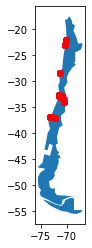

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
chile = world.loc[world['name'] == 'Chile']
ax = chile.plot()
gdf.plot(ax = ax, color = "red") 
print(chile.crs)
plt.show()

In [21]:
chile.explore()

In [22]:
comunas = gpd.read_file("./data/comunas/comunas.shp")
comunas.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."


In [23]:
puchuncavi = comunas[comunas["Comuna"] == "Puchuncaví"]

In [24]:
print(puchuncavi.crs)
puchuncavi = puchuncavi.to_crs(epsg=4326)
puchuncavi

EPSG:3857


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
206,23471,111211.210524,6,6,5105,5,4.239863e+08,137214.674697,Región de Valparaíso,Puchuncaví,Valparaíso,"MULTIPOLYGON (((-71.48978 -32.70836, -71.48989..."


In [25]:
import folium
map = folium.Map(location = [-33.37041450381538, -70.69793610926665], crs = "EPSG3857" ,zoom_start=10, tiles='OpenStreetMap')
map

In [26]:
sim_geo = gpd.GeoSeries(chile['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
folium.Popup(chile["name"].values[0]).add_to(geo_j)
geo_j.add_to(map)
map

In [27]:
puntos = gdf["geometry"].value_counts().index
plantas = []
for i in range(0, 18):
    planta = gdf.loc[gdf["geometry"] == puntos[i]].iloc[0]["Planta"]
    plantas.append(planta)
markers = pd.DataFrame({"Planta": plantas, "geometry": puntos})
markers.head()

,Planta,geometry
0,GUACOLDA,POINT (-71.24738 -28.47212)
1,CENTRAL TERMOELECTRICA CAMPICHE,POINT (-71.48330 -32.74940)
2,CENTRAL TÉRMICA MEJILLONES,POINT (-70.41139 -23.08888)
3,CENTRAL TERMOELECTRICA BOCAMINA U1,POINT (-73.16584 -37.02279)
4,CENTRAL TERMOELÉCTRICA NUEVA TOCOPILLA,POINT (-70.20840 -22.09810)


In [28]:
for _, row in markers.iterrows():
    lat = row["geometry"].y
    lon = row["geometry"].x
    folium.Marker(location=[lat, lon],
                  popup=row["Planta"]).add_to(map)

map

In [29]:
sim_geo2 = gpd.GeoSeries(puchuncavi['geometry']).simplify(tolerance=0.001)
geo_j2 = sim_geo2.to_json()
geo_j2 = folium.GeoJson(data=geo_j2, style_function=lambda x: {'fillColor': 'green'})
folium.Popup(puchuncavi["Comuna"].values[0]).add_to(geo_j2)
geo_j2.add_to(map)
map

In [30]:
df_aguas = gpd.read_file("./data/Masas_Lacustres/masas_lacustres.shp")
df_aguas.head()

,objectid,st_area_sh,st_length_,Nombre,Tipo,geometry
0,1,1.411784e+08,77845.633228,Salar de San Martín o Carcote,Salar,"POLYGON ((-7605868.923 -2425613.170, -7605850...."
1,2,3.087091e+08,147548.911324,Salar de Ascotan,Salar,"POLYGON ((-7597857.995 -2442164.143, -7597825...."
2,3,1.218202e+04,532.486240,None,Laguna,"POLYGON ((-7738411.433 -2494152.945, -7738388...."
3,4,1.439584e+06,12002.113642,Embalse Conchi,Embalse,"POLYGON ((-7637434.400 -2512504.257, -7637447...."
4,5,2.706124e+06,11821.430217,None,Salar,"POLYGON ((-7591081.555 -2511143.364, -7591057...."


In [31]:
df_aguas = df_aguas[~df_aguas["Nombre"].isnull()]

In [32]:
df_aguas.head()

,objectid,st_area_sh,st_length_,Nombre,Tipo,geometry
0,1,1.411784e+08,77845.633228,Salar de San Martín o Carcote,Salar,"POLYGON ((-7605868.923 -2425613.170, -7605850...."
1,2,3.087091e+08,147548.911324,Salar de Ascotan,Salar,"POLYGON ((-7597857.995 -2442164.143, -7597825...."
3,4,1.439584e+06,12002.113642,Embalse Conchi,Embalse,"POLYGON ((-7637434.400 -2512504.257, -7637447...."
7,10,1.097105e+05,1881.107083,Laguna Chita,Laguna,"POLYGON ((-7494235.902 -2629276.596, -7494172...."
10,26,5.499615e+07,53562.348042,Salar de Tara,Salar,"POLYGON ((-7490049.775 -2630398.197, -7490123...."


In [33]:
df_aguas["Tipo"].value_counts()

Laguna         852
Lago           224
Embalse        123
Tranque         55
Salar           48
Estero          43
Glaciar          3
Ventisquero      1
Name: Tipo, dtype: int64

In [34]:
df_aguas2 = gpd.read_file("./data/Red_Hidrografica/Red_Hidrografica.shp")
df_aguas2 = df_aguas2[~df_aguas2["Nombre"].isnull()]
df_aguas2.head()

,objectid,fid_drenes,cod_comuna,shape_leng,st_length_,Nombre,Dren_Tipo,Region,Provincia,Comuna,geometry
0,1,18231,1240,592.367618,900.245347,Estero Triple,Estero,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"MULTILINESTRING ((-8322721.754 -6260445.190, -..."
1,2,18231,1240,4395.679933,6684.114801,Estero Triple,Estero,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"MULTILINESTRING ((-8322601.918 -6260627.679, -..."
2,3,18554,1240,1175.704231,1798.390825,Estero Dona Ana,Estero,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"MULTILINESTRING ((-8361306.123 -6322289.680, -..."
3,4,18554,1240,4331.636599,6627.655554,Estero Dona Ana,Estero,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"MULTILINESTRING ((-8360921.482 -6322265.853, -..."
4,5,18582,1240,1725.164577,2640.838605,Estero Dona Ana,Estero,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"MULTILINESTRING ((-8364978.242 -6328874.799, -..."


In [35]:
df_aguas2["Dren_Tipo"].value_counts()

Río                                     16716
Quebrada                                11513
Estero                                  11136
Canal                                     130
Arroyo                                    125
Quebrada Intermitente                      92
Zanjon                                     18
Cajon                                      10
Lineas de Agua y/o Quebrada permanen        4
Estero Cambrales                            1
Río Quitacalzones                           1
Name: Dren_Tipo, dtype: int64

In [36]:
df_aguas2[df_aguas2["Nombre"].str.contains("Mejillones")]

,objectid,fid_drenes,cod_comuna,shape_leng,st_length_,Nombre,Dren_Tipo,Region,Provincia,Comuna,geometry
73449,76916,9542,2102,1552.185278,1691.076117,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7828922.758 -2648598.780, -782893..."
73453,76920,9551,2102,2972.705151,3236.337768,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7817417.482 -2647980.017, -781740..."
73460,76927,9557,2102,3549.745143,3859.666465,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7825123.204 -2649092.818, -782516..."
73461,76928,9562,2102,730.966150,795.609727,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7824426.265 -2649391.486, -782444..."
73462,76929,9563,2102,3892.290215,4236.474354,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7821135.009 -2649478.168, -782112..."
73466,76933,9567,2102,429.528289,467.918241,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7821508.576 -2649752.271, -782148..."
73467,76934,9568,2102,3187.638960,3471.061678,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7821542.613 -2649774.261, -782156..."
73475,76942,9581,2102,1626.431785,1772.919009,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7814685.604 -2648910.502, -781467..."
73477,76944,9584,2102,806.105979,877.056673,Quebrada Mejillones,Quebrada,Región de Antofagasta,Antofagasta,Mejillones,"LINESTRING (-7813430.522 -2650059.275, -781337..."
